In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [4]:
iris_df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [5]:
iris_df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [7]:
sl = iris_df['sepal length (cm)']
v = sl.var()
v2 = (v*149)/150
st = np.sqrt(v2)
scaled = (sl-sl.mean())/st
scaled[:5]

0   -0.900681
1   -1.143017
2   -1.385353
3   -1.506521
4   -1.021849
Name: sepal length (cm), dtype: float64

In [10]:
scaled.mean(), scaled.std()

(-1.4684549872375404e-15, 1.0)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(iris_df)
scaled = scaler.transform(iris_df)
df2 = pd.DataFrame(scaled)
df2

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [11]:
sl = iris_df['sepal length (cm)']
max_sl = sl.max()
min_sl = sl.min()
scaled = (sl-min_sl)/(max_sl - min_sl)
scaled[:5]

0    0.222222
1    0.166667
2    0.111111
3    0.083333
4    0.194444
Name: sepal length (cm), dtype: float64

In [12]:
scaled.min(), scaled.max()

(0.0, 1.0)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(iris_df)
scaled = scaler.transform(iris_df)
df2 = pd.DataFrame(scaled)
df2

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [15]:
train_arr = np.arange(0,11).reshape(-1,1)
test_arr = np.arange(0,6).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(train_arr)
train_scaled = scaler.transform(train_arr)
scaler.fit(test_arr)
test_scaled = scaler.transform(test_arr)

print(train_scaled.reshape(-1))
print(test_scaled.reshape(-1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.2 0.4 0.6 0.8 1. ]


In [16]:
train_arr = np.arange(0,11).reshape(-1,1)
test_arr = np.arange(0,6).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit(train_arr)
train_scaled = scaler.transform(train_arr)
test_scaled = scaler.transform(test_arr)

print(train_scaled.reshape(-1))
print(test_scaled.reshape(-1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5]


## 타이타닉 생존자 예측

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('train_titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
df2 = df
df['Age'].fillna(df2['Age'].mean(), inplace=True)
df2['Cabin'].fillna('N', inplace = True)
df2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [20]:
df2['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [21]:
df2['Cabin'].value_counts()

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [22]:
df2['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [23]:
df2['Cabin'] = df['Cabin'].str[:1]
df2['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [24]:
g = df2.groupby(['Sex', 'Survived'])
g['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

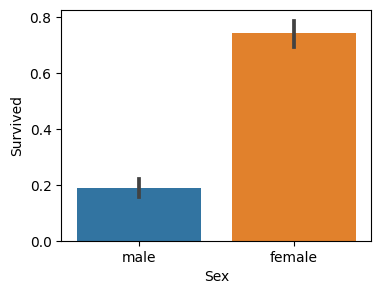

In [27]:
plt.figure(figsize=(4,3))
ax = plt.gca()
sns.barplot(x='Sex', y='Survived', data=df, ax = ax)
plt.show()

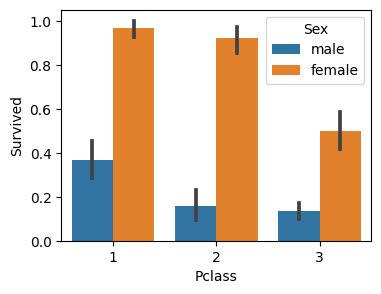

In [29]:
plt.figure(figsize=(4,3))
ax = plt.gca()
sns.barplot(x='Pclass', y = 'Survived', hue = 'Sex', data = df, ax = ax)
plt.show()

In [30]:
def get_category(age):
    cate = ""
    if age<0:
        cate = 'Unknown'
    elif age <= 5:
        cate = "B"
    elif age <= 12:
        cate = "C"
    elif age <= 18:
        cate = "T"
    elif age <= 25:
        cate = "S"
    elif age <= 35:
        cate = "Y"
    elif age <= 60:
        cate = "A"
    else:
        cate = "E"
    return cate

In [31]:
df['Age_cate'] = df2['Age'].apply(lambda x:get_category(x))

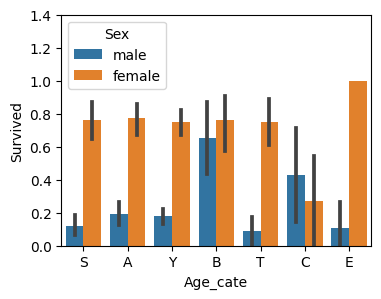

In [32]:
plt.figure(figsize=(4,3))
ax = plt.gca()
sns.barplot(x="Age_cate", y="Survived", hue = "Sex", data = df, ax = ax)
plt.ylim(0,1.4)
plt.show()

In [34]:
def encode_features(df,columns):
    for column in columns:
        le = LabelEncoder()
        le.fit(df[column])
        df[column] = le.transform(df[column])
        
    return df

In [36]:
df2 = encode_features(df2, ['Cabin', 'Sex', 'Embarked', 'Age_cate'])
df2[['Cabin', 'Sex', 'Embarked', 'Age_cate']].head(5)

,Cabin,Sex,Embarked,Age_cate
0,7,1,2,4
1,2,0,0,0
2,7,0,2,6
3,2,0,2,6
4,7,1,2,6


In [37]:
names_values = ['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'ETC']

def get_name_index(name):
    first, second = name.split(',')
    foos = second.split('.')
    tn = foos[0].replace(' ', '')
    
    for i in range(5):
        if tn == names_values[i]:
            return i
    return 5

In [39]:
df2['CN'] = df2['Name'].apply(lambda x:get_name_index(x))
df2['CN'].value_counts()

CN
0    517
2    182
1    125
3     40
5     20
4      7
Name: count, dtype: int64

In [40]:
df3 = df2.drop(['PassengerId', 'Name', 'Ticket', 'Age'], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
 8   Age_cate  891 non-null    int64  
 9   CN        891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


In [41]:
xdf = df3.drop('Survived', axis=1)
ydf = df3['Survived']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(xdf,ydf)

In [45]:
## 로지스틱 회귀 분류기

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
accuracy_score(y_test, lr_pred)

0.8161434977578476

In [53]:
df3.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_cate,CN
Survived,1.000000,-0.338481,-0.543351,-0.035322,0.081629,0.257307,-0.295113,-0.163517,-0.060861,0.387512
Pclass,-0.338481,1.000000,0.131900,0.083081,0.018443,-0.549500,0.742093,0.157112,0.244182,-0.144292
Sex,-0.543351,0.131900,1.000000,-0.114631,-0.245489,-0.182333,0.118635,0.104057,0.033941,-0.529582
SibSp,-0.035322,0.083081,-0.114631,1.000000,0.414838,0.159651,0.041058,0.066654,-0.070245,0.238506
Parch,0.081629,0.018443,-0.245489,0.414838,1.000000,0.216225,-0.031553,0.038322,-0.237680,0.235903
Fare,0.257307,-0.549500,-0.182333,0.159651,0.216225,1.000000,-0.525742,-0.221226,-0.127453,0.134482
Cabin,-0.295113,0.742093,0.118635,0.041058,-0.031553,-0.525742,1.000000,0.191973,0.213411,-0.129746
Embarked,-0.163517,0.157112,0.104057,0.066654,0.038322,-0.221226,0.191973,1.000000,-0.050778,-0.093261
Age_cate,-0.060861,0.244182,0.033941,-0.070245,-0.237680,-0.127453,0.213411,-0.050778,1.000000,-0.186745
CN,0.387512,-0.144292,-0.529582,0.238506,0.235903,0.134482,-0.129746,-0.093261,-0.186745,1.000000


In [55]:
lr = LogisticRegression(solver='liblinear')
cross_val_score(lr, xdf, ydf, cv = 5)

array([0.79888268, 0.80337079, 0.7752809 , 0.78651685, 0.79775281])

In [59]:
def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits=folds)
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(xdf)):
        x_train, x_test = xdf.values[train_index], xdf.values[test_index]
        y_train, y_test = ydf.values[train_index], ydf.values[test_index]
        clf.fit(x_train, y_train)
        pre_val = clf.predict(x_test)
        print(accuracy_score(y_test, pre_val))

In [60]:
lr = LogisticRegression(solver='liblinear')
exec_kfold(lr)

0.7932960893854749
0.8089887640449438
0.7808988764044944
0.7640449438202247
0.8146067415730337


In [62]:
parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]}

dtc = DecisionTreeClassifier()
grid_model = GridSearchCV(dtc, param_grid=parameters, scoring='accuracy', cv=5)
grid_model.fit(x_train, y_train)

print("최고 파라미터: ", grid_model.best_params_)
print("최고 정확되: ", grid_model.best_score_)

best_model = grid_model.best_estimator_
pred_val = best_model.predict(x_test)
print("acc: ", accuracy_score(y_test, pred_val))

최고 파라미터:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 정확되:  0.8188643249915835
acc:  0.8071748878923767
